# Seabornで簡単にお洒落な図を描画する編
> `index`
> + [24 ヒストグラム，散布図編](#24-ヒストグラム，散布図編)
> + [25 barplot, boxplot, swarmplot等](#25-barplot,-boxplot,-swarmplot等)
> + [26 Heatmapを描画](#26-Heatmapを描画)
> + [27 装飾(style)](#27-装飾(style))

> `Cf.`
> + [データサイエンスのためのPython入門24〜Seabornで簡単にお洒落な図を描画する【ヒストグラム，散布図編】〜](https://datawokagaku.com/seaborn_distribution/)
> + [データサイエンスのためのPython入門25〜Seabornで簡単にお洒落な図を描画する【barplot, boxplot, swarmplot等】〜](https://datawokagaku.com/seaborn_categoricalplot/)
> + [データサイエンスのためのPython入門26〜Seabornを使ってデータサイエンスに必須のHeatmapを描画する〜](https://datawokagaku.com/seaborn_heatmap/)
> + [データサイエンスのためのPython入門27〜Seabornの装飾(style)をいじる〜](https://datawokagaku.com/seaborn_set/)


## 24 ヒストグラム，散布図編

### |Seabornをimport

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### |一番頻出のsns.distplot()
    一番使います．とりあえず，あるデータの分布がみたい時にこれを呼びます．

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

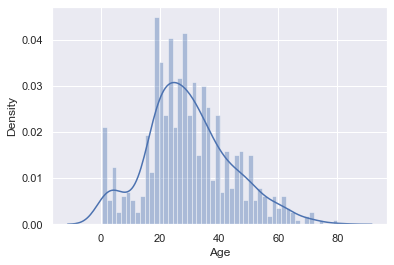

In [14]:
import pandas as pd

df = pd.read_csv('input/train.csv')
df = df.dropna(subset=["Age"]) # 描画の際のノイズ除去
sns.set() # グリッド線など引いてくれる
sns.distplot(df['Age'], bins=50) #kde : カーネル密度曲線の有無

### |sns.jointplot()で2変数の分布をみる

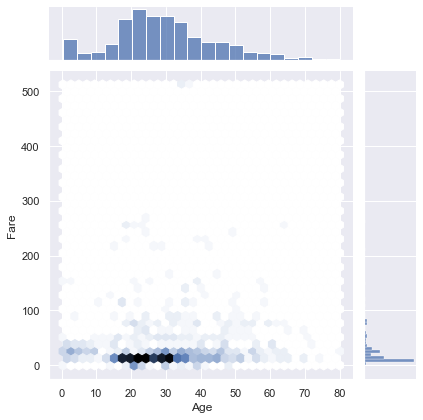

In [16]:
sns.jointplot(x='Age', y='Fare', data=df, kind='hex')

    kind指定してhexにすると重なりの具合が明瞭になる。（デフォでscatterが入っている）
    Fareの外れ値のせいであんまりいい図ではないですが 笑

### |(重要)sns.pairplot()で複数のカラムの分布を一発で表示

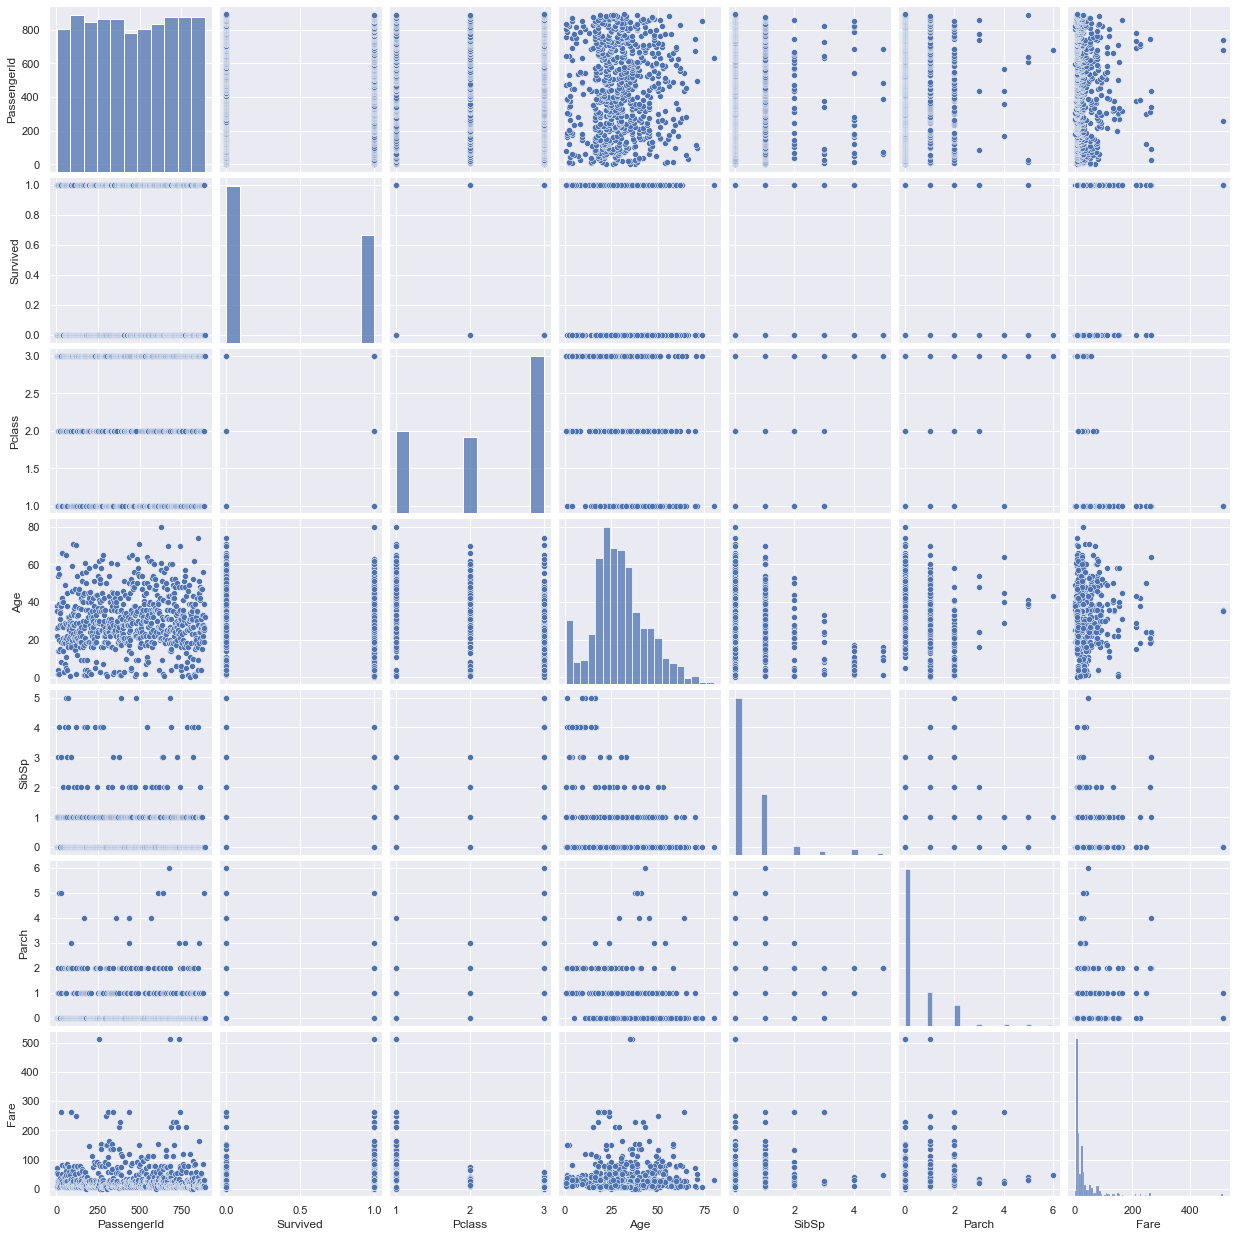

In [19]:
sns.pairplot(df)

>      ・・・いきなりこれみてもなにがなんだかって感じですよね笑
>      縦軸と横軸にカラムが並んでいて，そのカラム間の散布図を表示してます．
>      同じカラムが交差するところには，そのカラムのヒストグラムが表示されます．
>      つまり，例えば縦軸Fare，横軸Ageの散布図をみると先ほどのjointplotの例で出したplotと同じですし，
>      縦軸Age, 横軸Ageのグラフをみると，Ageのヒストグラムになってます．（bin幅が違うので先の例とはあまり似てませんが，）

> <img src='https://datawokagaku.com/wp-content/uploads/2020/02/pairplot_hist_joint.png' width=45%>


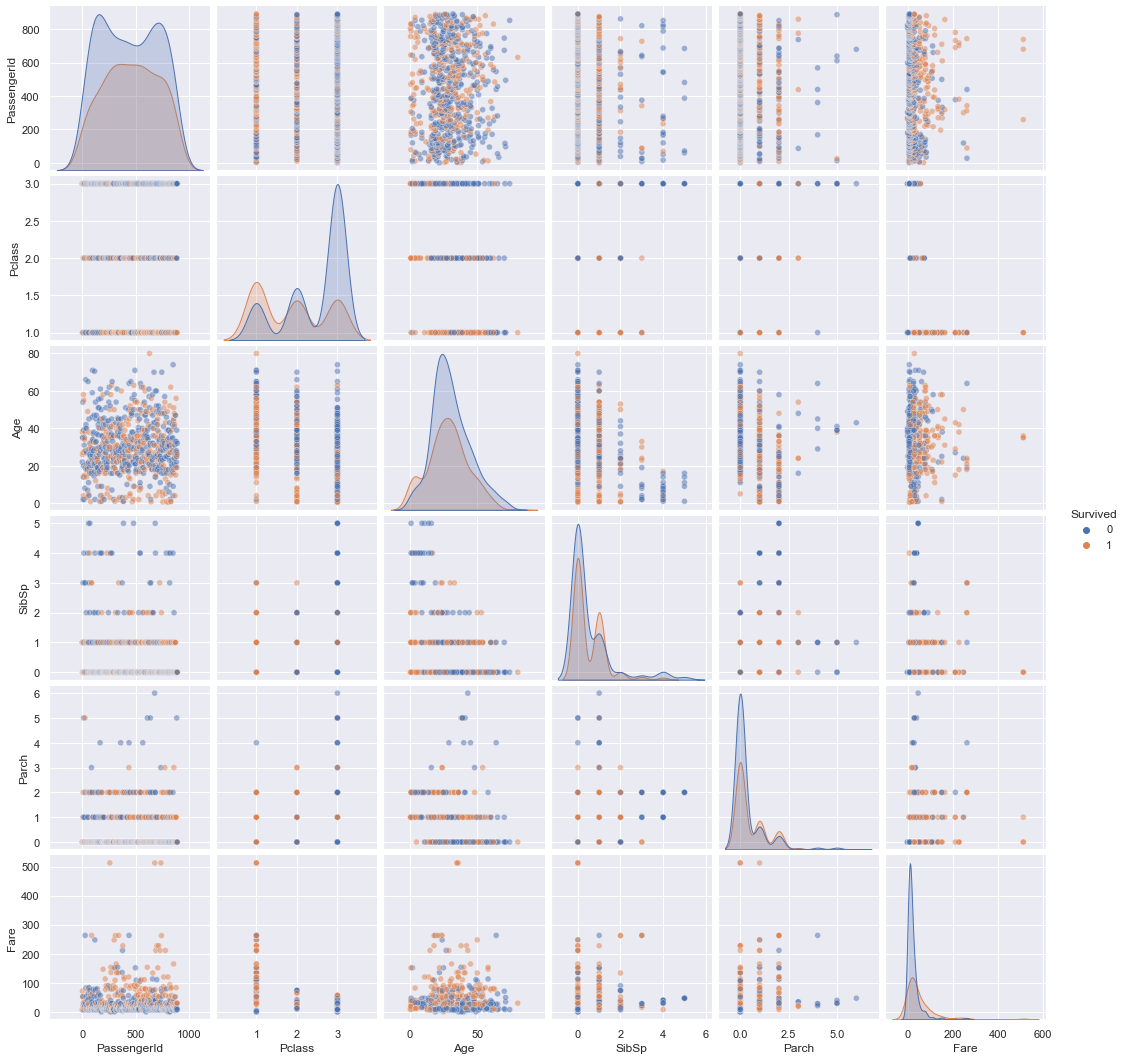

In [20]:
sns.pairplot(df, hue='Survived', kind='scatter', plot_kws={'alpha':0.5})

> `Cf.`
> + [seabornでグラフを複数のグラフを描画する - Qiita](https://qiita.com/txt_only/items/b954e26be739bee5621e)

In [21]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='size', ylabel='count'>

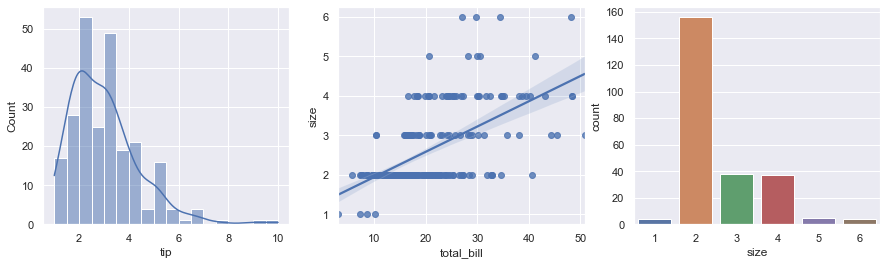

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
sns.histplot(tips_df['tip'], kde=True, ax=ax1)
sns.regplot(x='total_bill', y='size', data=tips_df, ax=ax2)
sns.countplot(x='size', data=tips_df, ax=ax3)

## 25 barplot, boxplot, swarmplot等

## 26 Heatmapを描画

## 27 装飾(style)